In [7]:
from pckgConOpt.maes import MAES, epsMAgES, keep_range
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

from pckgConOpt import tuttestfunctions as ttf
from pckgConOpt import o1,o2,o3,o4


objective function: cop1
best fitness: 1.578e-29
best constraint violation: 0
number of function evaluations: 10000


C:\Users\micha\AppData\Local\Temp\ipykernel_21112\996010965.py:60: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  cax.set_yscale('log')


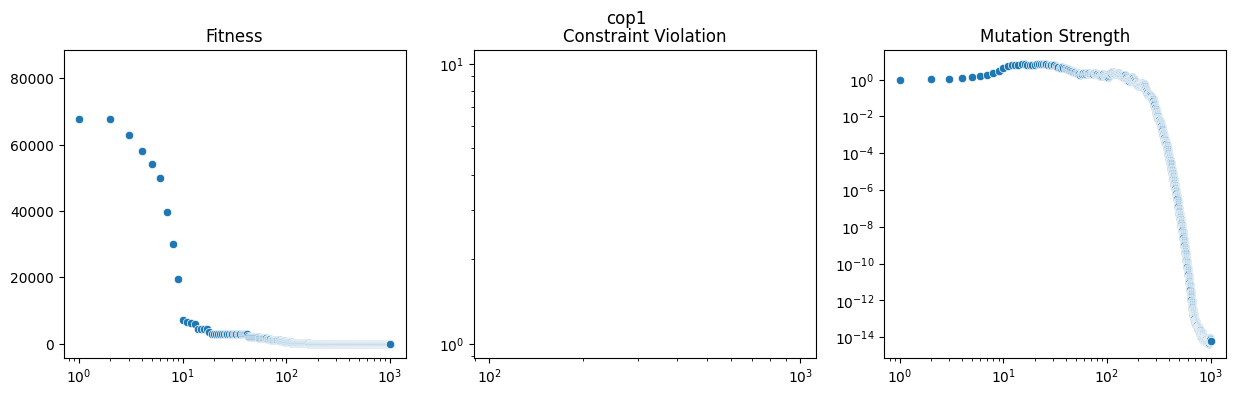

objective function: cop2
best fitness: 0.0002609
best constraint violation: 0
number of function evaluations: 10051


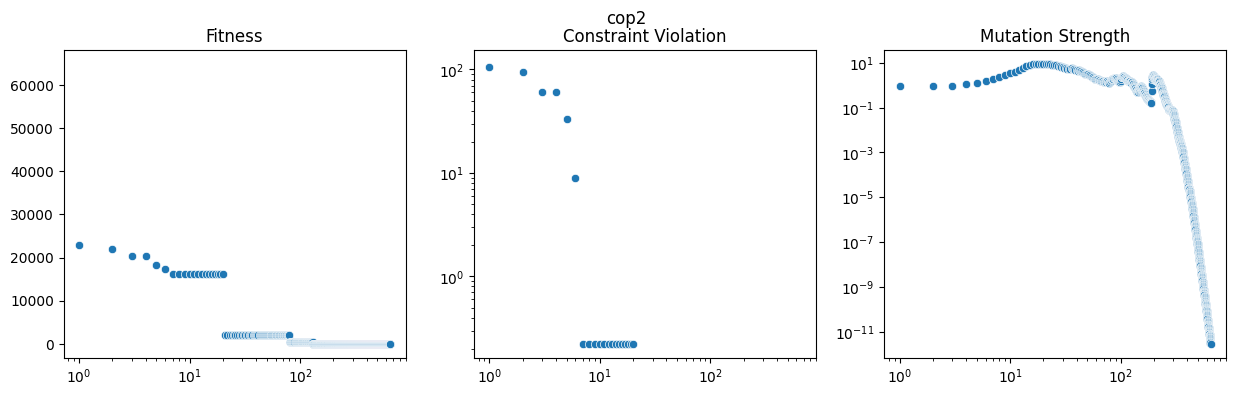

C:\Users\micha\Desktop\IEEE SSCI 2025\es4cop-main\es4cop-main\pckgConOpt\maes_hemi.py:427: RuntimeWarning: overflow encountered in exp
  sigma = np.min([sigma * np.exp((cs/2)*(np.linalg.norm(ps)**2/dim - 1)),sigmax])


objective function: cop3
best fitness: 74.91
best constraint violation: 13.82
number of function evaluations: 10001


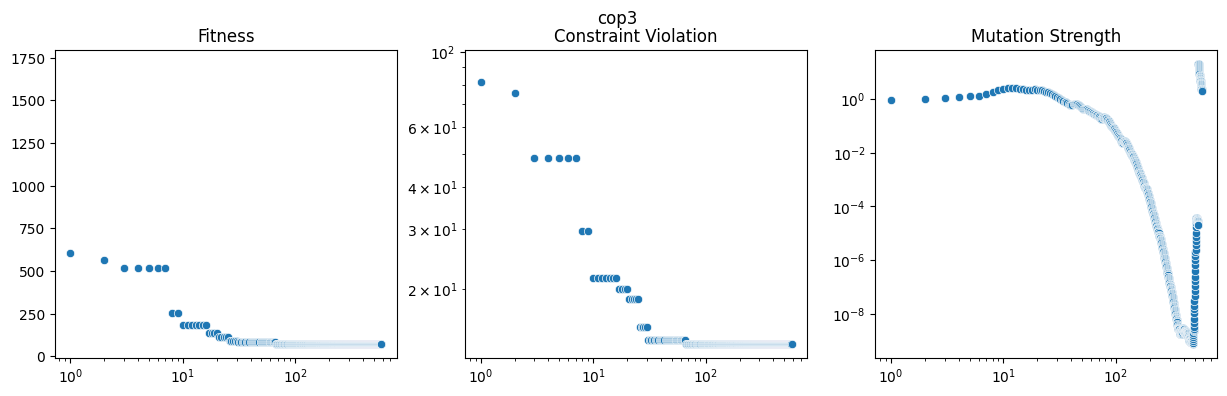

objective function: cop4
best fitness: -857.4
best constraint violation: 1.925e+04
number of function evaluations: 10014


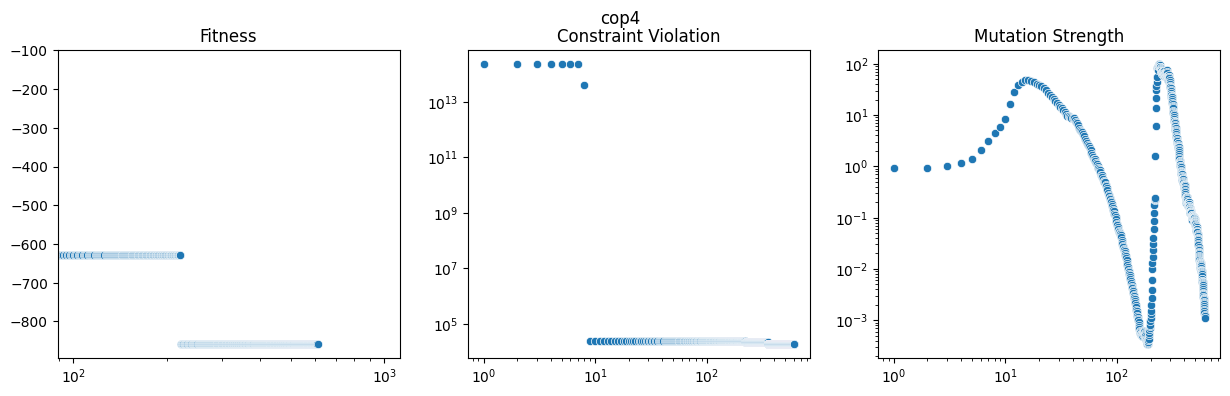

objective function: cop5
best fitness: 3009
best constraint violation: 0.4016
number of function evaluations: 10044


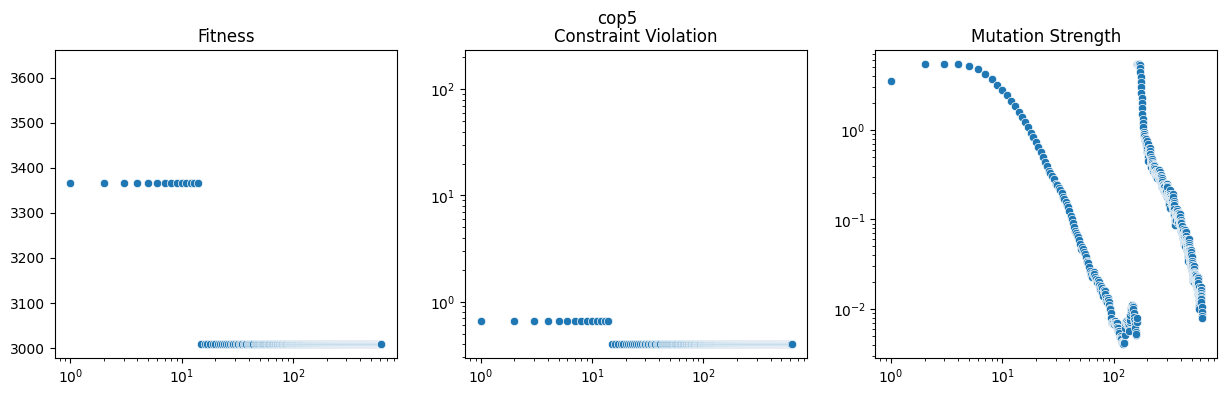

In [8]:
### define parameters

# seed random number generator
default_rng = np.random.default_rng(123345)

# problem dimension
d = 10

# population parameters
mu = 3
lam = 10
sigma = 1.

# run parameters
maxIter = 10**3
budget = maxIter*lam
delta = 10**(-4)
max_reps = 3


# problems
for objFun in [ttf.cop1, ttf.cop2, ttf.cop3, ttf.cop4, ttf.cop5]:
    if objFun == ttf.cop3:
        lower_bounds = -20*np.ones(shape=(d,))
        upper_bounds = 20*np.ones(shape=(d,))
    elif objFun == ttf.cop5:
        d = 7
        lower_bounds = np.array([2.6, 0.7, 17, 7.3, 7.3, 2.9, 5])
        upper_bounds = np.array([3.6, 0.8, 28, 8.3, 8.3, 3.9, 5.5])
    else:
        lower_bounds = -100*np.ones(shape=(d,))
        upper_bounds = 100*np.ones(shape=(d,))

    # random initial point
    x_init = lower_bounds + (upper_bounds - lower_bounds)*default_rng.uniform(size=(d,))

    # run MA-ES
    out = epsMAgES(mu,lam,sigma,lower_bounds,upper_bounds,delta,maxIter,budget,max_reps,objFun)
    gb_y, gb_fv, best_cv, dyn_fit, dyn_cv, dyn_sig, dyn_ynorm, dyn_gen, dyn_fev = out

    # print main results
    print('objective function: {0}'.format(objFun.__name__))
    print('best fitness: {0:.4g}'.format(gb_fv))
    print('best constraint violation: {0:.4g}'.format(best_cv))
    
    print('number of function evaluations: {0:d}'.format(dyn_fev[-1]))
    
    # visualize single run statistics
    fig, axs = plt.subplots(1,3,figsize=(15,4))
    
    cax = axs[0]
    sea.scatterplot(x=dyn_gen, y = dyn_fit, legend='full', ax=cax)
    cax.set_xscale('log')
    #cax.set_yscale('log')
    cax.set_title('Fitness')
    
    cax = axs[1]
    sea.scatterplot(x=dyn_gen, y = dyn_cv, legend='full', ax=cax)
    cax.set_xscale('log')
    cax.set_yscale('log')
    cax.set_title('Constraint Violation')
    
    cax = axs[2]
    sea.scatterplot(x=dyn_gen, y = dyn_sig, legend='full', ax=cax)
    cax.set_xscale('log')
    cax.set_yscale('log')
    cax.set_title('Mutation Strength')

    fig.suptitle(objFun.__name__)
    plt.show()